In [185]:
!pip install Prophet

In [186]:
import pandas as pd
import prophet as Prophet
import datetime as dt




In [187]:
# Load the annual_df.csv file from the resources folder
annual_df = pd.read_csv('../resources/quarterly_df.csv', parse_dates=True).dropna()
annual_df.head()

,DATE,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion
0,2000-01-01,5.678921,-4987.333333,4.033333,3.353333,207400.0,1272.073,10002.179
1,2000-04-01,6.272022,70591.333333,3.933333,2.756667,365568.0,1284.187,10247.720
2,2000-07-01,6.519430,20127.000000,4.000000,3.130000,318888.0,1291.650,10318.165
3,2000-10-01,6.475315,-781.666667,3.900000,2.883333,389484.0,1306.215,10435.744
4,2001-01-01,5.593687,-7483.666667,4.233333,3.303333,236820.0,1301.000,10470.231


In [188]:
# Create a new dataframe with only the 'DATE' and 'CPI (Inflation)' columns
cpi_df = annual_df[['DATE', 'CPI (Inflation)']]
cpi_df.reset_index(drop=True, inplace=True)
cpi_df.head()


,DATE,CPI (Inflation)
0,2000-01-01,3.353333
1,2000-04-01,2.756667
2,2000-07-01,3.130000
3,2000-10-01,2.883333
4,2001-01-01,3.303333


In [189]:
# Rename the columns to 'ds' and 'y' for the Prophet model
cpi_df = cpi_df.rename(columns={'DATE': 'ds', 'CPI (Inflation)': 'y'})
cpi_df.head()

,ds,y
0,2000-01-01,3.353333
1,2000-04-01,2.756667
2,2000-07-01,3.130000
3,2000-10-01,2.883333
4,2001-01-01,3.303333


In [190]:
from prophet import Prophet

# Create a new Prophet model
model = Prophet()

In [191]:
# Fit the model with the cpi_df dataframe
model.fit(cpi_df)

20:32:58 - cmdstanpy - INFO - Chain [1] start processing
20:32:58 - cmdstanpy - INFO - Chain [1] done processing


In [192]:
# Create a future dataframe to hold forecast values
# Make the prediction go 3 years into the future
cpi_forecast = model.make_future_dataframe(periods=3, freq='Y')

cpi_forecast.tail()

,ds
93,2023-04-01
94,2023-07-01
95,2023-12-31
96,2024-12-31
97,2025-12-31


In [193]:
#Create the forecast
forecast = model.predict(cpi_forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
93,2023-04-01,4.168807,2.956271,5.515792
94,2023-07-01,4.309051,2.973303,5.657198
95,2023-12-31,5.054143,3.764885,6.381911
96,2024-12-31,5.009142,3.649617,6.275432
97,2025-12-31,5.307776,3.910131,6.624772


/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


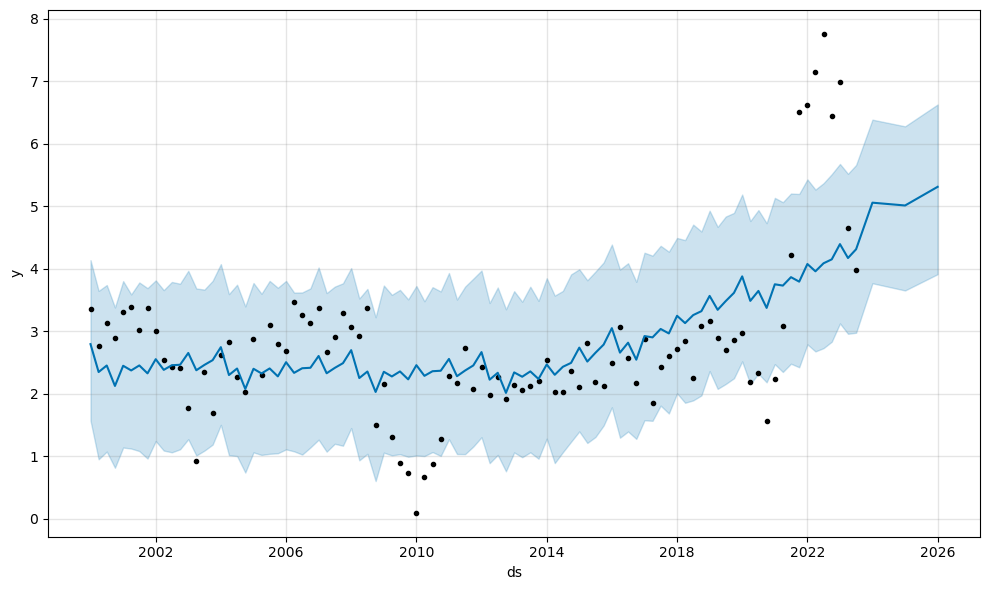

In [194]:
#Plot the CPI forecast
cpi_forecast_plot = model.plot(forecast)


In [195]:
#Set index of the cpi_forecast dataframe to the 'ds' column
cpi_forecast = forecast.set_index('ds')

#View only the yhat, yhat_lower, and yhat_upper columns
cpi_forecast_view = cpi_forecast[['yhat', 'yhat_lower', 'yhat_upper']]
cpi_forecast_view.tail()



,yhat,yhat_lower,yhat_upper
ds,,,
2023-04-01,4.168807,2.956271,5.515792
2023-07-01,4.309051,2.973303,5.657198
2023-12-31,5.054143,3.764885,6.381911
2024-12-31,5.009142,3.649617,6.275432
2025-12-31,5.307776,3.910131,6.624772


<Axes: xlabel='ds'>

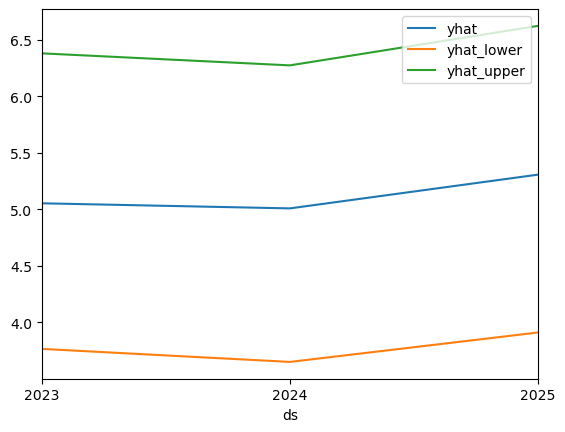

In [196]:
#From the cpi_forecast_view dataframe, plot the data
cpi_forecast_view.iloc[-3:].plot()

/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/jbgraham073/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

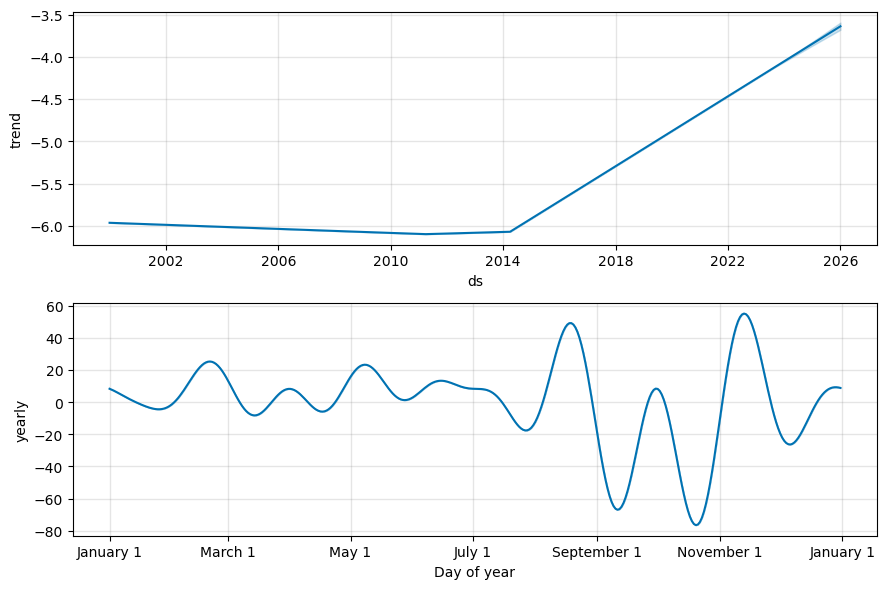

In [197]:
#plot the trend components of the forecast
cpi_forecast_plot = model.plot_components(forecast)